## Importing Libraries

In [3]:
%matplotlib inline 

import os
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

## Loading csv files and reading with pandas

In [4]:
# (encoding = "ISO-8859-1") used to avoid encoding errors.
# four files will be uploaded for salary and statistics.
stats18 = pd.read_csv("data/player_stats_18.csv", encoding = "ISO-8859-1" )
stats19 = pd.read_csv("data/player_stats_19.csv", encoding = "ISO-8859-1" )
salary18 = pd.read_csv("data/player_salary_18.csv", encoding= "ISO-8859-1")
salary19 = pd.read_csv("data/player_salary_19.csv", encoding= "ISO-8859-1")

In [5]:
# Uploading drafting files to get players' experience from them. 
files = ['data/drafted_players_18.csv', 'data/drafted_players_17.csv', 'data/drafted_players_16.csv',
        'data/drafted_players_15.csv', 'data/drafted_players_14.csv', 'data/drafted_players_13.csv', 'data/drafted_players_12.csv',
         'data/drafted_players_11.csv', 'data/drafted_players_11.csv', 'data/drafted_players_10.csv', 'data/drafted_players_09.csv', 
         'data/drafted_players_08.csv', 'data/drafted_players_07.csv', 'data/drafted_players_06.csv', 'data/drafted_players_05.csv',
         'data/drafted_players_04.csv', 'data/drafted_players_03.csv', 'data/drafted_players_02.csv', 'data/drafted_players_01.csv', 
         'data/drafted_players_00.csv', 'data/drafted_players_99.csv', 'data/drafted_players_98.csv']
df =[]
for file in files:
    data = pd.read_csv(file, encoding = "ISO-8859-1", header=1)
    df.append(data)
drafted = pd.concat(df)
drafted = drafted[['Player','username', 'Yrs']]
drafted.dropna(how='any', inplace=True)

In [6]:
stats18.head() # lets see the top 5 rows of 2018 stats

,Rk,Player,Pos,username,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,abrinal01,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,acyqu01,28,PHO,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,adamsja01,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,adamsst01,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,adebaba01,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [7]:
#Selecting the rows we will be using from salary files
salary18 = salary18[['Player', 'Salary 2018-19']]
salary18.head() # lets see the top 5 rows of 2018 player salaries

,Player,Salary 2018-19
0,Stephen Curry,"$37,457,154"
1,Chris Paul,"$35,654,150"
2,LeBron James,"$35,654,150"
3,Russell Westbrook,"$35,654,150"
4,Blake Griffin,"$32,088,932"


In [8]:
drafted.head() # # lets see the top 5 rows of drafted players

,Player,username,Yrs
0,Deandre Ayton,aytonde01,2
1,Marvin Bagley,baglema01,2
2,Luka Don?i?,doncilu01,2
3,Jaren Jackson,jacksja02,2
4,Trae Young,youngtr01,2


In [9]:
df = pd.merge(stats18, salary18, on='Player') # Merging 2018 player salary with their stats
df.head()

,Rk,Player,Pos,username,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary 2018-19
0,3,Jaylen Adams,PG,adamsja01,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,"$270,014"
1,4,Steven Adams,C,adamsst01,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,"$24,157,303"
2,5,Bam Adebayo,C,adebaba01,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,"$2,955,840"
3,8,LaMarcus Aldridge,C,aldrila01,33,SAS,81,81,33.2,8.4,16.3,0.519,0.1,0.5,0.238,8.3,15.8,0.528,0.522,4.3,5.1,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,"$22,347,015"
4,10,Grayson Allen,SG,allengr01,23,UTA,38,2,10.9,1.8,4.7,0.376,0.8,2.6,0.323,0.9,2.1,0.443,0.466,1.2,1.6,0.750,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6,"$2,074,320"


In [10]:
df.info() # seeing Dtypes of columns and non-null count.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 577
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rk              578 non-null    int64  
 1   Player          578 non-null    object 
 2   Pos             578 non-null    object 
 3   username        578 non-null    object 
 4   Age             578 non-null    int64  
 5   Tm              578 non-null    object 
 6   G               578 non-null    int64  
 7   GS              578 non-null    int64  
 8   MP              578 non-null    float64
 9   FG              578 non-null    float64
 10  FGA             578 non-null    float64
 11  FG%             576 non-null    float64
 12  3P              578 non-null    float64
 13  3PA             578 non-null    float64
 14  3P%             550 non-null    float64
 15  2P              578 non-null    float64
 16  2PA             578 non-null    float64
 17  2P%             572 non-null    flo

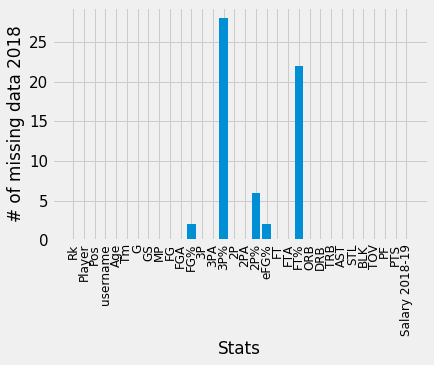

In [11]:
# There were some missing data
# Let's see which stats are the missing data from
missing18 = df.groupby('Rk').apply(lambda x:x.isnull().sum()).sum()
# Bar plot
_ = plt.bar(df.columns, missing18)
_ = plt.xlabel('Stats')
_ = plt.ylabel('# of missing data 2018')
_ = plt.xticks(fontsize= 12, rotation=90)
_ = plt.yticks(fontsize= 15)

In [12]:
# getting rid of rows that has null values and selecting the first duplicate which shows the most played team for a player
df = df.fillna(0)

In [13]:
df = df.merge(drafted, how= 'outer', left_on= 'Player', right_on= 'Player')
df.head()

,Rk,Player,Pos,username_x,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary 2018-19,username_y,Yrs
0,3.0,Jaylen Adams,PG,adamsja01,22.0,ATL,34.0,1.0,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,"$270,014",NaN,NaN
1,4.0,Steven Adams,C,adamsst01,25.0,OKC,80.0,80.0,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,"$24,157,303",adamsst01,7
2,5.0,Bam Adebayo,C,adebaba01,21.0,MIA,82.0,28.0,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,"$2,955,840",adebaba01,3
3,8.0,LaMarcus Aldridge,C,aldrila01,33.0,SAS,81.0,81.0,33.2,8.4,16.3,0.519,0.1,0.5,0.238,8.3,15.8,0.528,0.522,4.3,5.1,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,"$22,347,015",aldrila01,14
4,10.0,Grayson Allen,SG,allengr01,23.0,UTA,38.0,2.0,10.9,1.8,4.7,0.376,0.8,2.6,0.323,0.9,2.1,0.443,0.466,1.2,1.6,0.750,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6,"$2,074,320",allengr01,2


In [14]:
# dropping some columns that we won't use at all throughout this analysis
df = df.drop(['Rk', 'username_y', 'username_x'], axis=1)

In [15]:
#renaming some columns for readibility and dropping NaN values, those players are not playing these season.
df = df.rename(columns={'Salary 2018-19': 'salary', 'Yrs': 'Years', 'Pos': 'Position', 'Tm': 'Team',
                        'G':'Game', 'MP':'Minutes', 'TRB':'Rebound', 'AST':'Assist', 'PTS': 'Point'})
df.dropna(subset=['salary'], inplace=True)
df.dropna(subset=['Years'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 1 to 622
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    501 non-null    object 
 1   Position  501 non-null    object 
 2   Age       501 non-null    float64
 3   Team      501 non-null    object 
 4   Game      501 non-null    float64
 5   GS        501 non-null    float64
 6   Minutes   501 non-null    float64
 7   FG        501 non-null    float64
 8   FGA       501 non-null    float64
 9   FG%       501 non-null    float64
 10  3P        501 non-null    float64
 11  3PA       501 non-null    float64
 12  3P%       501 non-null    float64
 13  2P        501 non-null    float64
 14  2PA       501 non-null    float64
 15  2P%       501 non-null    float64
 16  eFG%      501 non-null    float64
 17  FT        501 non-null    float64
 18  FTA       501 non-null    float64
 19  FT%       501 non-null    float64
 20  ORB       501 non-null    float6

In [16]:
#Converting Salary and Years serieses to numeric.
df['salary'] = df['salary'].replace({'\$': '', ',': '', ' ': ''}, regex=True)
df['salary'] = pd.to_numeric(df['salary'])
df['Years'] = pd.to_numeric(df['Years'])

In [17]:
#Since the Years are based on 2019-2020 season. We will adjust the years by substracting -1.
def year_adjustment(x):
    return x-1

df['Years'] = df.apply(lambda x: year_adjustment(x['Years']),axis=1)

In [18]:
#Salary adjustment
def classify_salary(x):
    if x <= 1000000:
        return 0.5
    if x > 1000000 and x <= 3000000:
        return 2
    elif x > 3000000 and x <=5000000:
        return 4
    elif x > 5000000 and x <=7000000:
        return 6
    elif x > 7000000 and x <=9000000:
        return 8
    elif x > 9000000 and x <=11000000:
        return 10
    elif x > 11000000 and x <=13000000:
        return 12
    elif x > 13000000 and x <=15000000:
        return 14
    elif x > 15000000 and x <=17000000:
        return 16
    elif x > 17000000 and x <=19000000:
        return 18
    elif x > 19000000 and x <=21000000:
        return 20
    elif x > 21000000 and x <=23000000:
        return 22
    elif x > 23000000 and x <=25000000:
        return 24
    elif x > 25000000 and x <=27000000:
        return 26
    elif x > 27000000 and x <=29000000:
        return 28
    elif x > 29000000 and x <=31000000:
        return 30
    elif x > 31000000 and x <=33000000:
        return 32
    elif x > 33000000 and x <=35000000:
        return 34
    elif x > 35000000 and x <=37000000:
        return 36
    elif x > 37000000 and x <=39000000:
        return 38
    else:
        return 40

#Age adjustment
def classify_age(x):
    if x >= 17 and x <= 22: 
        return 20
    elif x > 22 and x <=24:
        return 23
    elif x > 24 and x <=26:
        return 25
    elif x > 26 and x <=28:
        return 27
    elif x > 28 and x <=30:
        return 29
    elif x > 30 and x <=32:
        return 31
    elif x > 32 and x <=34:
        return 33
    elif x > 34 and x <=36:
        return 35
    elif x > 36 and x <=38:
        return 37
    elif x > 38 and x <=40:
        return 39
    else:
        return 40

#Years on NBA adjustment
def classify_year(x):
    if x < 1:
        return 0
    elif x >= 1 and x <= 3: 
        return 2
    elif x > 3 and x <=5:
        return 4
    elif x > 5 and x <=7:
        return 6
    elif x > 7 and x <=9:
        return 8
    elif x > 9 and x <=11:
        return 10
    elif x > 11 and x <=13:
        return 12
    elif x > 13 and x <=15:
        return 14
    elif x > 15 and x <=17:
        return 16
    elif x > 17 and x <=19:
        return 18
    elif x > 19 and x <=21:
        return 20
    else:
        return 22  

#Point adjustment
def classify_point(x):
    if x < 1:
        return 0
    elif x >= 1 and x <= 3: 
        return 2
    elif x > 3 and x <=5:
        return 4
    elif x > 5 and x <=7:
        return 6
    elif x > 7 and x <=9:
        return 8
    elif x > 9 and x <=11:
        return 10
    elif x > 11 and x <=13:
        return 12
    elif x > 13 and x <=15:
        return 14
    elif x > 15 and x <=17:
        return 16
    elif x > 17 and x <=19:
        return 18
    elif x > 19 and x <=21:
        return 20
    elif x > 21 and x <=23:
        return 22
    elif x > 23 and x <=25:
        return 24
    elif x > 25 and x <=27:
        return 26
    elif x > 27 and x <=29:
        return 28
    elif x > 29 and x <=31:
        return 30
    else:
        return 32

df['Sal_Mid'] = df.apply(lambda x: classify_salary(x['salary']),axis=1)
df['Age_Mid'] = df.apply(lambda x: classify_age(x['Age']),axis=1)
df['Year_Mid'] = df.apply(lambda x: classify_year(x['Years']),axis=1)
df['Point_Mid'] = df.apply(lambda x: classify_point(x['Point']),axis=1)

## Cleaning data

### Let's see what column names mean


In [19]:
# Let's see what each abbreviation means.
feature_names = {
        'Abbreviation': ['Player', 'Pos', 'Game', 'GS', 'FG', '3P','FT',
                         'DRB', 'TRB', 'Assist', 'STL', 'BLK', 'TOV',
                         'Age', 'MP','PF', 'Point', 'salary'], 
    
        'Meaning':['Name','Position','Games Played','Games Started',\
                   'Field Goals Made','3 Pointers Made','Free Throws Made',\
                   'Defensive Rebounds','Total Rebounds','Assists Per Game',\
                   'Steals per Game','Blocks Per Game','Turnovers per Game',\
                   'Age','Minutes Played per Game', 'Personal Fouls', 'Points per Game',\
                   'Salary for 2018-2019 season'] 
                }

In [20]:
name_table = pd.DataFrame.from_dict(feature_names)
name_table.to_csv('data/feature_names.csv')
name_table

,Abbreviation,Meaning
0,Player,Name
1,Pos,Position
2,Game,Games Played
3,GS,Games Started
4,FG,Field Goals Made
5,3P,3 Pointers Made
6,FT,Free Throws Made
7,DRB,Defensive Rebounds
8,TRB,Total Rebounds
9,Assist,Assists Per Game


In [21]:
df.sort_values(by = ['Game'], ascending= False).tail() # sorting values then dropping duplicates.


,Player,Position,Age,Team,Game,GS,Minutes,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,Rebound,Assist,STL,BLK,TOV,PF,Point,salary,Years,Sal_Mid,Age_Mid,Year_Mid,Point_Mid
544,Jason Smith,C,32.0,NOP,2.0,0.0,10.0,1.0,4.5,0.222,1.0,3.5,0.286,0.0,1.0,0.0,0.333,1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.0,0.0,0.5,1.5,4.0,5450000,10.0,6.0,31,10,4
182,Jawun Evans,PG,22.0,OKC,1.0,0.0,1.0,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1378242,1.0,2.0,20,2,0
548,Ray Spalding,PF,21.0,DAL,1.0,0.0,1.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184746,0.0,0.5,20,0,0
252,Andrew Harrison,PG,24.0,MEM,1.0,0.0,5.0,1.0,2.0,0.500,0.0,1.0,0.000,1.0,1.0,1.0,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1544951,2.0,2.0,23,2,2
491,Zhou Qi,PF,23.0,HOU,1.0,0.0,1.0,1.0,1.0,1.000,0.0,0.0,0.000,1.0,1.0,1.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1378242,1.0,2.0,23,2,2


In [22]:
# to see if we have any duplicate entries, which are most probably because of changing team during mid-season.
number_of_duplicated_names= len(df)-df['Player'].nunique()
number_of_duplicated_names

164

In [23]:
# getting rid of duplicate values and selecting the first duplicate which shows the most played team for a player
df = df.drop_duplicates(subset = 'Player')
len(df)

337

In [24]:
# Some players have two position specified. We are sleecting the first position.
def classify_position(x):
    if x == 'C-PF':
        return 'C'
    elif x == 'PF-SF':
        return 'PF'
    elif x == 'SF-SG':
        return 'SF'
    elif x == 'SG-PF':
        return 'SG'
    elif x == 'SG-SF':
        return 'SG'
    else:
        return x
df['Position'] = df.apply(lambda x: classify_position(x['Position']),axis=1)
df.groupby('Position')['Player'].count()
# C=Center, PG=PointGuard PF=PowerForward, SF=SmallForward, SG=ShootingGuard

Position
C     71
PF    69
PG    66
SF    49
SG    82
Name: Player, dtype: int64

In [25]:
df.describe()

,Age,Game,GS,Minutes,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,Rebound,Assist,STL,BLK,TOV,PF,Point,salary,Years,Sal_Mid,Age_Mid,Year_Mid,Point_Mid
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,3.370000e+02,337.000000,337.000000,337.000000,337.000000,337.000000
mean,26.275964,56.934718,29.596439,21.783086,3.729674,8.105638,0.456184,0.989614,2.820475,0.295510,2.741246,5.283976,0.507591,0.515644,1.612166,2.124332,0.730795,0.952819,3.181899,4.136499,2.259050,0.693769,0.459050,1.246588,1.909199,10.056677,7.981259e+06,6.109792,8.056380,25.652819,5.851632,9.982196
std,4.469918,21.562931,29.600671,8.499603,2.277232,4.729693,0.086571,0.841084,2.203453,0.122566,1.920811,3.518164,0.091614,0.077179,1.447391,1.789487,0.140482,0.840811,1.937982,2.603787,1.910447,0.408529,0.429267,0.822088,0.719336,6.348342,8.544865e+06,4.272328,8.501826,4.568389,4.001704,6.348016
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.709200e+04,-1.000000,0.500000,20.000000,0.000000,0.000000
25%,23.000000,43.000000,2.000000,15.100000,2.100000,4.600000,0.411000,0.300000,1.100000,0.280000,1.300000,2.600000,0.467000,0.482000,0.700000,0.900000,0.671000,0.400000,1.800000,2.300000,1.000000,0.400000,0.200000,0.700000,1.400000,5.600000,1.567707e+06,2.000000,2.000000,23.000000,2.000000,6.000000
50%,26.000000,64.000000,18.000000,21.900000,3.200000,7.100000,0.444000,0.900000,2.600000,0.333000,2.100000,4.200000,0.506000,0.515000,1.100000,1.600000,0.752000,0.700000,2.800000,3.700000,1.600000,0.600000,0.400000,1.000000,1.900000,8.500000,3.940402e+06,5.000000,4.000000,25.000000,4.000000,8.000000
75%,30.000000,75.000000,58.000000,28.600000,5.100000,10.700000,0.493000,1.500000,4.100000,0.365000,3.900000,7.500000,0.553000,0.554000,2.000000,2.800000,0.822000,1.200000,4.100000,5.200000,3.000000,0.900000,0.600000,1.600000,2.400000,13.400000,1.200000e+07,9.000000,12.000000,29.000000,8.000000,14.000000
max,42.000000,82.000000,82.000000,36.900000,10.800000,24.500000,1.000000,5.100000,13.200000,0.529000,9.300000,16.500000,1.000000,1.000000,9.700000,11.000000,1.000000,5.400000,11.100000,15.600000,10.700000,2.200000,2.700000,5.000000,3.800000,36.100000,3.745715e+07,21.000000,38.000000,40.000000,20.000000,32.000000


In [26]:
df.to_csv('dataset.csv', index=False)